# 2.1 初始神经网络

## step 1 : 加载数，即获取训练集/测试集的样本(samples)与标签(labels)

In [5]:
#加载keras中预定义好与mnist相关的函数库，可以帮助我们高效处理数据
from keras.datasets import mnist 

#原书数据集会下载到.../.keras/datasets/mnist.npz
#从原始数据集中通过函数load_data()获取训练集与测试集的样本和标签
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

### 1.1 查看训练集数据的样本和标签

In [6]:
train_images.shape

(60000, 28, 28)

In [7]:
train_images[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

#### 训练数据的样本由维度为60000 x 28 x 28的数组构成，即60000个样本，每个样本由28 x 28的数组组成，对应每一个图片的长、宽像素值

In [8]:
train_labels

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

#### 可以看到每一个图像样本所对应标签，即数字分类，如第一个样本对应的是数字“5”

### 1.2 查看测试集数据的样本和标签

In [9]:
test_images.shape

(10000, 28, 28)

In [10]:
test_labels

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

## step 2 ： 建网络，叠加各类神经网络层

In [11]:
from keras import models #keras框架中用于初始化网络模型的库
from keras import layers #keras框架中用于初始化网络中不同的层

### 2.1 初始化网络

In [12]:
network = models.Sequential()

### 2.2 按需叠加层

In [13]:
#叠加首层——全连接层,首层还需要指定input_shape
network.add(layers.Dense(512,activation = 'relu', input_shape = (28 * 28,)))

#叠加第二层——全连接层，注意是躲分类问题，所以激活函数应使用softmax
network.add(layers.Dense(10, activation = 'softmax'))

Instructions for updating:
Colocations handled automatically by placer.


In [14]:
network.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 512)               401920    
_________________________________________________________________
dense_2 (Dense)              (None, 10)                5130      
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


## step 3 : 译模型，编译配置好的模型

### loss: 损失函数，衡量网络在训练集上的表现
### optimizer：根据网络在训练集上的表现不断更新网络参数
### metric: 衡量训练集所有数据在更新后模型上的表现

In [15]:
#指定优化器、损失函数、监控指标 (计算损失--->更新网络--->查看最终模型表现)
network.compile(optimizer = 'rmsprop', loss = 'categorical_crossentropy', metrics = ['accuracy'])

## step 4：备数据，根据初始化的网络要求，准备训练集与测试集的输入格式

### 4.1 准备训练集输入格式

#### 4.1.1 准备训练集样本数据格式

In [16]:
#降维，(60000,28,28) ---> (60000, 28x28), 三维数组变二维数组
processed_train_images = train_images.reshape((60000,28*28))

In [17]:
processed_train_images.shape

(60000, 784)

In [18]:
#转换数据类型,并归一化
processed_train_images = processed_train_images.astype('float32')/255

In [19]:
processed_train_images[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

#### 4.1.2 准备训练集数据标签数据格式

In [20]:
#独热编码
from keras.utils import to_categorical
processed_train_labels = to_categorical(train_labels)

In [21]:
processed_train_labels

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

In [22]:
train_labels

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

### 4.2 准备测试集输入格式

In [23]:
processed_test_images = test_images.reshape((10000,28*28))

In [24]:
processed_test_images = processed_test_images.astype('float32')/255

In [25]:
from keras.utils import to_categorical
processed_test_labels = to_categorical(test_labels)

## step 5: 训模型，将预处理后的训练数据灌入初始化的网络模型

In [26]:
history = network.fit(processed_train_images, processed_train_labels, epochs = 10)

Instructions for updating:
Use tf.cast instead.
Epoch 1/10
60000/60000 [==============================] - 17s 281us/step - loss: 0.2029 - acc: 0.9403
Epoch 2/10
60000/60000 [==============================] - 16s 269us/step - loss: 0.0920 - acc: 0.9737
Epoch 3/10
60000/60000 [==============================] - 15s 258us/step - loss: 0.0657 - acc: 0.9815
Epoch 4/10
60000/60000 [==============================] - 14s 238us/step - loss: 0.0532 - acc: 0.9852
Epoch 5/10
60000/60000 [==============================] - 11s 185us/step - loss: 0.0429 - acc: 0.9888
Epoch 6/10
60000/60000 [==============================] - 11s 188us/step - loss: 0.0351 - acc: 0.9906
Epoch 7/10
60000/60000 [==============================] - 11s 184us/step - loss: 0.0281 - acc: 0.9926
Epoch 8/10
60000/60000 [==============================] - 11s 185us/step - loss: 0.0243 - acc: 0.9940
Epoch 9/10
60000/60000 [==============================] - 11s 184us/step - loss: 0.0200 - acc: 0.9956
Epoch 10/10
60000/60000 [=========

## step 6: 评模型，使用训练的模型在测试集上进行测试

#### 评估模型在训练集上的表现

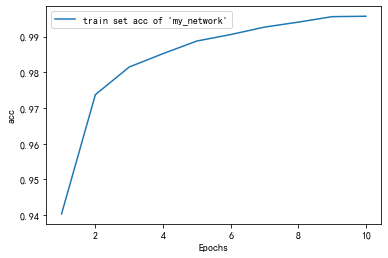

In [28]:
import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.rcParams['font.sans-serif'] = ['SimHei'] #为了图表中的汉字显示正常
mpl.rcParams['font.family']='sans-serif'

acc = history.history['acc']
x = range(1,len(acc)+1)
plt.plot(x,acc,label = 'train set acc of \'my_network\'')
plt.xlabel('Epochs')
plt.ylabel('acc')
plt.legend()
plt.show()

#### 评估模型在测试集上的表现

In [29]:
test_loss, test_acc = network.evaluate(processed_test_images,processed_test_labels)

10000/10000 [==============================] - 1s 62us/step


In [47]:
test_acc

0.9812

In [48]:
processed_test_images[0:2].shape

(2, 784)

In [49]:
network.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 512)               401920    
_________________________________________________________________
dense_10 (Dense)             (None, 10)                5130      
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


In [50]:
import numpy as np
np.argmax(network.predict(processed_test_images)[0])

7

In [51]:
network.predict(processed_test_images).shape

(10000, 10)